# Task 6.2C

# Introduction

This analysis aims to evaluate the clustering performance of different clustering techniques in a microclimate sensor dataset, with SensorLocation used as the ground truth for evaluation.

# Load Dataset

In [3]:
import pandas as pd
df = pd.read_csv("microclimate-sensors-data.csv")
df

,Device_id,Time,SensorLocation,LatLong,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
0,ICTMicroclimate-08,2025-02-09T11:54:37+11:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,153.0,358.0,0.0,3.9,7.9,23.9,57.300000,1009.700000,0.0,0.0,80.500000
1,ICTMicroclimate-11,2025-02-09T12:02:11+11:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,144.0,356.0,0.0,2.0,7.8,24.5,56.200000,1005.300000,0.0,0.0,62.900000
2,ICTMicroclimate-05,2025-02-09T12:03:24+11:00,Enterprize Park - Pole ID: COM1667,"-37.8204083, 144.9591192",0.0,45.0,133.0,0.0,1.5,2.7,25.0,60.000000,1009.600000,1.0,3.0,68.500000
3,ICTMicroclimate-01,2025-02-09T12:02:43+11:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,150.0,NaN,NaN,1.6,NaN,23.1,61.099998,1009.000000,0.0,5.0,51.700001
4,ICTMicroclimate-09,2025-02-09T12:17:37+11:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,241.0,359.0,0.0,0.9,4.4,25.6,53.700000,1007.900000,0.0,0.0,60.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308235,ICTMicroclimate-08,2025-04-18T15:32:17+10:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,48.0,359.0,0.0,1.7,7.4,30.5,27.300000,1005.700000,5.0,5.0,76.600000
308236,ICTMicroclimate-04,2025-04-18T15:31:00+10:00,Batman Park,"-37.8221828, 144.9562225",0.0,304.0,359.0,0.0,0.4,4.2,30.3,29.700000,1008.500000,8.0,8.0,65.700000
308237,ICTMicroclimate-01,2025-04-18T15:29:15+10:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,347.0,NaN,NaN,0.1,NaN,31.9,21.100000,1004.700012,10.0,13.0,57.299999
308238,ICTMicroclimate-11,2025-04-18T15:51:11+10:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,340.0,359.0,0.0,5.0,7.5,30.4,28.800000,1001.100000,5.0,7.0,76.300000


In [4]:
df.shape

(308240, 16)

In [5]:
a = df["Time"].unique()
a.sort()
a

array(['2024-05-29T13:47:33+10:00', '2024-05-29T13:49:14+10:00',
       '2024-05-29T13:49:46+10:00', ..., '2025-04-18T15:47:23+10:00',
       '2025-04-18T15:49:41+10:00', '2025-04-18T15:51:11+10:00'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308240 entries, 0 to 308239
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Device_id             308240 non-null  object 
 1   Time                  308240 non-null  object 
 2   SensorLocation        302097 non-null  object 
 3   LatLong               296757 non-null  object 
 4   MinimumWindDirection  276852 non-null  float64
 5   AverageWindDirection  307762 non-null  float64
 6   MaximumWindDirection  276694 non-null  float64
 7   MinimumWindSpeed      276694 non-null  float64
 8   AverageWindSpeed      307762 non-null  float64
 9   GustWindSpeed         276694 non-null  float64
 10  AirTemperature        307762 non-null  float64
 11  RelativeHumidity      307762 non-null  float64
 12  AtmosphericPressure   307762 non-null  float64
 13  PM25                  294491 non-null  float64
 14  PM10                  294491 non-null  float64
 15  

In [7]:
df["SensorLocation"].value_counts()

SensorLocation
1 Treasury Place                                                                    35891
Birrarung Marr Park - Pole 1131                                                     30984
Tram Stop 7C - Melbourne Tennis Centre Precinct - Rod Laver Arena                   30929
SkyFarm (Jeff's Shed). Rooftop - Melbourne Conference & Exhibition Centre (MCEC)    30884
CH1 rooftop                                                                         30871
101 Collins St L11 Rooftop                                                          30815
Tram Stop 7B - Melbourne Tennis Centre Precinct - Rod Laver Arena                   30741
Swanston St - Tram Stop 13 adjacent Federation Sq & Flinders St Station             30314
Batman Park                                                                         21491
Enterprize Park - Pole ID: COM1667                                                  15954
Royal Park Asset ID: COM2707                                                        1

## Data Cleaning and Preprocessing

In [8]:
# Remove any extra whitespace and split LatLong
df[['Latitude', 'Longitude']] = df['LatLong'].str.strip().str.split(',', expand=True)

# Convert to float
# Convert to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [9]:
df

,Device_id,Time,SensorLocation,LatLong,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise,Latitude,Longitude
0,ICTMicroclimate-08,2025-02-09T11:54:37+11:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,153.0,358.0,0.0,3.9,7.9,23.9,57.300000,1009.700000,0.0,0.0,80.500000,-37.818452,144.967847
1,ICTMicroclimate-11,2025-02-09T12:02:11+11:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,144.0,356.0,0.0,2.0,7.8,24.5,56.200000,1005.300000,0.0,0.0,62.900000,-37.812888,144.975086
2,ICTMicroclimate-05,2025-02-09T12:03:24+11:00,Enterprize Park - Pole ID: COM1667,"-37.8204083, 144.9591192",0.0,45.0,133.0,0.0,1.5,2.7,25.0,60.000000,1009.600000,1.0,3.0,68.500000,-37.820408,144.959119
3,ICTMicroclimate-01,2025-02-09T12:02:43+11:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,150.0,NaN,NaN,1.6,NaN,23.1,61.099998,1009.000000,0.0,5.0,51.700001,-37.818593,144.971640
4,ICTMicroclimate-09,2025-02-09T12:17:37+11:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,241.0,359.0,0.0,0.9,4.4,25.6,53.700000,1007.900000,0.0,0.0,60.200000,-37.822331,144.952170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308235,ICTMicroclimate-08,2025-04-18T15:32:17+10:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,48.0,359.0,0.0,1.7,7.4,30.5,27.300000,1005.700000,5.0,5.0,76.600000,-37.818452,144.967847
308236,ICTMicroclimate-04,2025-04-18T15:31:00+10:00,Batman Park,"-37.8221828, 144.9562225",0.0,304.0,359.0,0.0,0.4,4.2,30.3,29.700000,1008.500000,8.0,8.0,65.700000,-37.822183,144.956222
308237,ICTMicroclimate-01,2025-04-18T15:29:15+10:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,347.0,NaN,NaN,0.1,NaN,31.9,21.100000,1004.700012,10.0,13.0,57.299999,-37.818593,144.971640
308238,ICTMicroclimate-11,2025-04-18T15:51:11+10:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,340.0,359.0,0.0,5.0,7.5,30.4,28.800000,1001.100000,5.0,7.0,76.300000,-37.812888,144.975086


### Feature Removal

Several features have been removed due to being identifiers that are not relevant for clustering. The remaining features better represent the environmental conditions for meaningful cluster analysis.

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252399 entries, 0 to 308239
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Device_id             252399 non-null  object 
 1   Time                  252399 non-null  object 
 2   SensorLocation        252399 non-null  object 
 3   LatLong               252399 non-null  object 
 4   MinimumWindDirection  252399 non-null  float64
 5   AverageWindDirection  252399 non-null  float64
 6   MaximumWindDirection  252399 non-null  float64
 7   MinimumWindSpeed      252399 non-null  float64
 8   AverageWindSpeed      252399 non-null  float64
 9   GustWindSpeed         252399 non-null  float64
 10  AirTemperature        252399 non-null  float64
 11  RelativeHumidity      252399 non-null  float64
 12  AtmosphericPressure   252399 non-null  float64
 13  PM25                  252399 non-null  float64
 14  PM10                  252399 non-null  float64
 15  Noise

In [12]:
df = df.drop(columns=['Device_id', 'Time', 'LatLong'
                      ])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252399 entries, 0 to 308239
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SensorLocation        252399 non-null  object 
 1   MinimumWindDirection  252399 non-null  float64
 2   AverageWindDirection  252399 non-null  float64
 3   MaximumWindDirection  252399 non-null  float64
 4   MinimumWindSpeed      252399 non-null  float64
 5   AverageWindSpeed      252399 non-null  float64
 6   GustWindSpeed         252399 non-null  float64
 7   AirTemperature        252399 non-null  float64
 8   RelativeHumidity      252399 non-null  float64
 9   AtmosphericPressure   252399 non-null  float64
 10  PM25                  252399 non-null  float64
 11  PM10                  252399 non-null  float64
 12  Noise                 252399 non-null  float64
 13  Latitude              252399 non-null  float64
 14  Longitude             252399 non-null  float64
dtypes: fl

### Handling Missing SensorLocation

Rows with missing SensorLocation were removed to retain only labeled data for evaluating clustering performance.

### Investigation of Missing PM/Noise Data

significant number of entries were found to be incomplete.

In [14]:
df.isnull().sum()

SensorLocation          0
MinimumWindDirection    0
AverageWindDirection    0
MaximumWindDirection    0
MinimumWindSpeed        0
AverageWindSpeed        0
GustWindSpeed           0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
Latitude                0
Longitude               0
dtype: int64

To understand the source,  any missing value in PM25, PM10, or Noise is filtered for all rows.
This revealed that 13,223 out of 13,549 missing rows (over 97%) originated from a single sensor location "Royal Park Asset ID: COM2707, suggests that this sensor does not collect PM or Noise data at all, likely due to hardware limitations.



In [15]:
#missing_rows = df[df[['PM25', 'PM10', 'Noise']].isnull().any(axis=1)]
df['SensorLocation'].value_counts()


SensorLocation
Tram Stop 7C - Melbourne Tennis Centre Precinct - Rod Laver Arena                   30921
SkyFarm (Jeff's Shed). Rooftop - Melbourne Conference & Exhibition Centre (MCEC)    30877
CH1 rooftop                                                                         30839
101 Collins St L11 Rooftop                                                          30800
Tram Stop 7B - Melbourne Tennis Centre Precinct - Rod Laver Arena                   30736
1 Treasury Place                                                                    30481
Swanston St - Tram Stop 13 adjacent Federation Sq & Flinders St Station             30310
Batman Park                                                                         21488
Enterprize Park - Pole ID: COM1667                                                  15947
Name: count, dtype: int64

PM2.5, PM10, and Noise are critical features for clustering microclimate conditions, as they reflect pollution and environmental stress, a key aspects of distinguishing sensor regions. 

However, the "Royal Park Asset ID: COM2707" sensor contributes 13,223 rows, all of which are missing values for these three features.

Imputing such a large portion of missing data is not reliable in this context, especially since meaningful imputation would typically require patterns within the same sensor location and this sensor records no values at all for PM and Noise. Alternatively,exclusing PM and noise from the clustering model to accommodate this sensor would significantly reduce clustering quality across all other sensors.

As a result, the Royal Park sensor was removed to ensure feature consistency and maintain the integrity of the clustering process across all remaining observations.

In [16]:
df = df[df['SensorLocation'] != 'Royal Park Asset ID: COM2707']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252399 entries, 0 to 308239
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SensorLocation        252399 non-null  object 
 1   MinimumWindDirection  252399 non-null  float64
 2   AverageWindDirection  252399 non-null  float64
 3   MaximumWindDirection  252399 non-null  float64
 4   MinimumWindSpeed      252399 non-null  float64
 5   AverageWindSpeed      252399 non-null  float64
 6   GustWindSpeed         252399 non-null  float64
 7   AirTemperature        252399 non-null  float64
 8   RelativeHumidity      252399 non-null  float64
 9   AtmosphericPressure   252399 non-null  float64
 10  PM25                  252399 non-null  float64
 11  PM10                  252399 non-null  float64
 12  Noise                 252399 non-null  float64
 13  Latitude              252399 non-null  float64
 14  Longitude             252399 non-null  float64
dtypes: fl

### Final Missing Values Cleanup

After removing Royal Park, 326 rows still contained missing values across all core features. Since no meaningful imputation could be performed and these rows carried no usable data, as imputation wil only cause repetitive data, we removed them as well.

In [18]:
df.isnull().sum()

SensorLocation          0
MinimumWindDirection    0
AverageWindDirection    0
MaximumWindDirection    0
MinimumWindSpeed        0
AverageWindSpeed        0
GustWindSpeed           0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
Latitude                0
Longitude               0
dtype: int64

In [19]:
df = df.dropna(subset=['AverageWindDirection'])


In [20]:
df.isnull().sum()

SensorLocation          0
MinimumWindDirection    0
AverageWindDirection    0
MaximumWindDirection    0
MinimumWindSpeed        0
AverageWindSpeed        0
GustWindSpeed           0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
Latitude                0
Longitude               0
dtype: int64

### Visualization

In [21]:
df.describe()

,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise,Latitude,Longitude
count,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000,252399.000000
mean,20.687404,180.358682,314.565751,0.212844,1.220126,3.710775,17.818782,64.669034,1013.841571,5.396887,7.097952,69.047981,-37.818276,144.968641
std,56.210638,120.018868,78.444607,0.570164,0.997616,2.568037,5.923443,16.757382,7.996909,7.772385,9.005932,10.232544,0.003615,0.009738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,6.300000,986.400000,0.000000,0.000000,0.000000,-37.822331,144.952170
25%,0.000000,69.000000,314.000000,0.000000,0.500000,1.800000,13.600000,54.200000,1008.500000,1.000000,2.000000,62.200000,-37.822183,144.959119
50%,0.000000,176.000000,354.000000,0.000000,1.000000,3.100000,17.300000,66.200000,1013.900000,3.000000,4.000000,69.200000,-37.819499,144.967847
75%,0.000000,302.000000,358.000000,0.000000,1.700000,5.200000,21.000000,76.600000,1018.900000,6.000000,8.000000,73.600000,-37.814604,144.975086
max,359.000000,359.000000,360.000000,11.400000,11.100000,52.500000,40.800000,99.800000,1042.900000,184.000000,204.000000,131.100000,-37.812860,144.982941


IndexError: index 9 is out of bounds for axis 0 with size 9

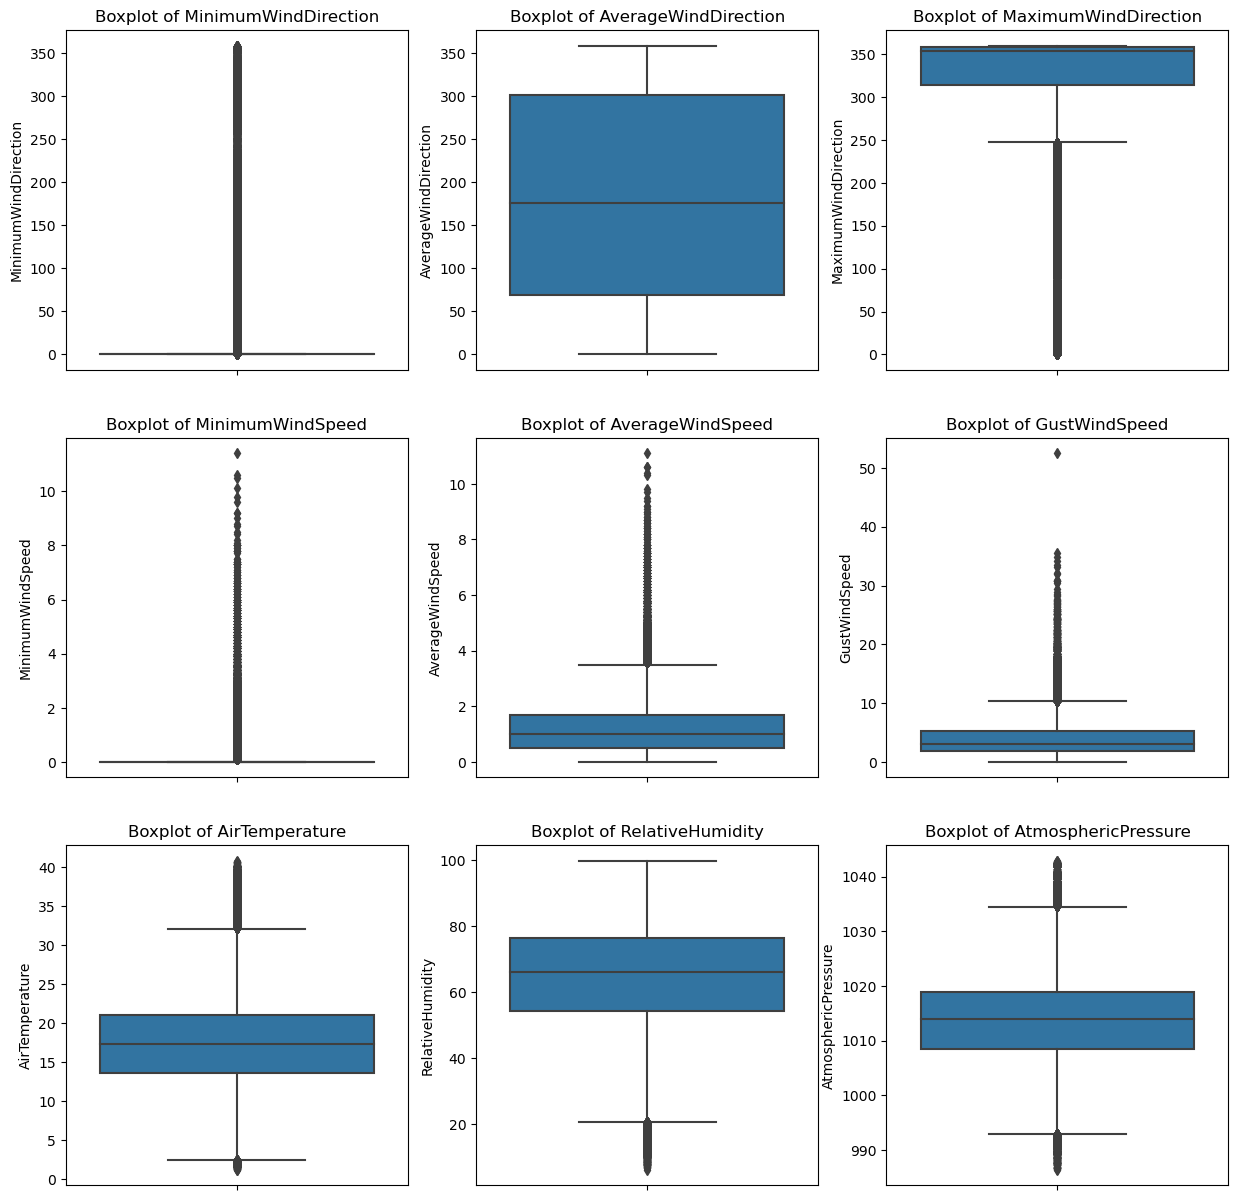

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# drop label due to its categorical feature
numeric_columns = df.drop(columns='SensorLocation')

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
axes = axes.flatten()

for i in range(len(numeric_columns.columns)):
    sns.boxplot(y=numeric_columns.iloc[:, i], ax=axes[i])
    axes[i].set_title(f'Boxplot of {numeric_columns.columns[i]}')
    
for j in range(len(numeric_columns.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Both the boxplots and descriptive statistics provide strong evidence of outliers in several features, particularly in PM2.5, PM10, and AtmosphericPressure. These outliers could be due to natural environmental events or sensor anomalies. 

### Standardize data

Rather than removing the outlier that may lost important dataset, the dataset is stadardize using z-score normalization. This process rescale all numeric column to have a mean of 0 and a standard deviation of 1. stardadization help reduce the infleunce of extreme value in distance-based model such as clustering, without discarding any data points. Standardization reduce the influence of large value, reduce the bias and maintain the integrity of the original dataset without discarding any data points.

In [22]:
data_norm=df.copy()
mu = data_norm.iloc[:,1:].mean(axis=0) # mean of each col
sigma = data_norm.iloc[:,1:].std(axis=0)  # std dev of each col
data_norm.iloc[:,1:]=(data_norm.iloc[:,1:]-mu)/sigma

data_norm

,SensorLocation,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise,Latitude,Longitude
0,Swanston St - Tram Stop 13 adjacent Federation...,-0.368034,-0.227953,0.553693,-0.373303,2.686278,1.631295,1.026636,-0.439749,-0.517897,-0.694367,-0.788142,1.119176,-0.048545,-0.081489
1,1 Treasury Place,-0.368034,-0.302941,0.528198,-0.373303,0.781738,1.592354,1.127928,-0.505391,-1.068109,-0.694367,-0.788142,-0.600826,1.490587,0.661839
2,Enterprize Park - Pole ID: COM1667,-0.368034,-1.127812,-2.314573,-0.373303,0.280543,-0.393598,1.212338,-0.278626,-0.530401,-0.565706,-0.455028,-0.053553,-0.589890,-0.977821
4,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,-0.368034,0.505265,0.566441,-0.373303,-0.320891,0.268386,1.313631,-0.654579,-0.742984,-0.694367,-0.788142,-0.864690,-1.121690,-1.691502
5,Enterprize Park - Pole ID: COM1667,-0.368034,1.471780,-3.602106,2.432909,0.681499,-0.588299,1.127928,-0.356203,-0.567916,-0.565706,-0.455028,-0.034007,-0.589890,-0.977821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308234,1 Treasury Place,-0.368034,1.421787,0.540945,-0.373303,-0.020174,-0.627240,0.520173,-0.582969,-0.893042,0.720900,0.433275,-1.910373,1.490587,0.661839
308235,Swanston St - Tram Stop 13 adjacent Federation...,-0.368034,-1.102816,0.566441,-0.373303,0.481021,1.436593,2.140852,-2.230004,-1.018090,-0.051064,-0.232952,0.738039,-0.048545,-0.081489
308236,Batman Park,-0.368034,1.030182,0.566441,-0.373303,-0.822086,0.190506,2.107088,-2.086784,-0.667955,0.334918,0.100162,-0.327190,-1.080802,-1.275295
308238,1 Treasury Place,-0.368034,1.330135,0.566441,-0.373303,3.788906,1.475534,2.123970,-2.140491,-1.593312,-0.051064,-0.010876,0.708721,1.490587,0.661839


# Question 1

In [23]:
X=data_norm.iloc[:,1:]
X

,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise,Latitude,Longitude
0,-0.368034,-0.227953,0.553693,-0.373303,2.686278,1.631295,1.026636,-0.439749,-0.517897,-0.694367,-0.788142,1.119176,-0.048545,-0.081489
1,-0.368034,-0.302941,0.528198,-0.373303,0.781738,1.592354,1.127928,-0.505391,-1.068109,-0.694367,-0.788142,-0.600826,1.490587,0.661839
2,-0.368034,-1.127812,-2.314573,-0.373303,0.280543,-0.393598,1.212338,-0.278626,-0.530401,-0.565706,-0.455028,-0.053553,-0.589890,-0.977821
4,-0.368034,0.505265,0.566441,-0.373303,-0.320891,0.268386,1.313631,-0.654579,-0.742984,-0.694367,-0.788142,-0.864690,-1.121690,-1.691502
5,-0.368034,1.471780,-3.602106,2.432909,0.681499,-0.588299,1.127928,-0.356203,-0.567916,-0.565706,-0.455028,-0.034007,-0.589890,-0.977821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308234,-0.368034,1.421787,0.540945,-0.373303,-0.020174,-0.627240,0.520173,-0.582969,-0.893042,0.720900,0.433275,-1.910373,1.490587,0.661839
308235,-0.368034,-1.102816,0.566441,-0.373303,0.481021,1.436593,2.140852,-2.230004,-1.018090,-0.051064,-0.232952,0.738039,-0.048545,-0.081489
308236,-0.368034,1.030182,0.566441,-0.373303,-0.822086,0.190506,2.107088,-2.086784,-0.667955,0.334918,0.100162,-0.327190,-1.080802,-1.275295
308238,-0.368034,1.330135,0.566441,-0.373303,3.788906,1.475534,2.123970,-2.140491,-1.593312,-0.051064,-0.010876,0.708721,1.490587,0.661839


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X)
X_pca

array([[ 1.98763791, -2.24303459,  1.2540756 , ..., -0.09523448,
        -0.193404  , -0.33165488],
       [ 1.21106223, -1.8852988 ,  0.26740535, ...,  0.34164463,
        -0.66757595, -0.53664024],
       [ 0.47973228, -0.38473101, -1.15279743, ...,  1.19019672,
         0.51232267, -0.50129192],
       ...,
       [-0.52267625, -1.97172061,  1.29723011, ...,  0.24108056,
         0.28635908,  0.04977296],
       [ 3.3924364 , -2.57144024,  2.85675714, ...,  0.95875351,
        -0.66311237, -0.2618013 ],
       [-0.70515071, -1.92208644,  1.1645991 , ...,  0.45915864,
         0.33177715,  0.11655611]])

[21.46 39.75 51.07 61.82 70.3  77.95 83.27 87.62 91.13 94.44 96.82]


Text(0, 0.5, 'Variance captured')

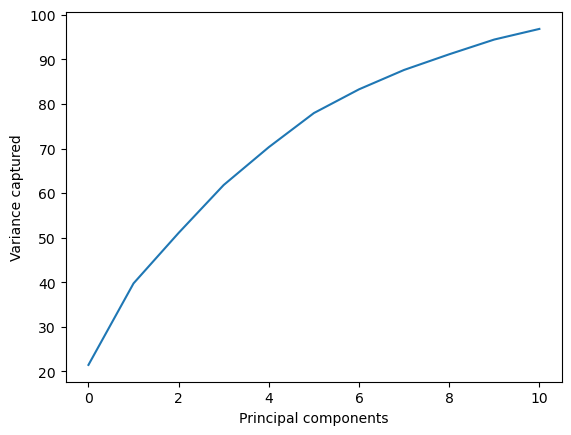

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

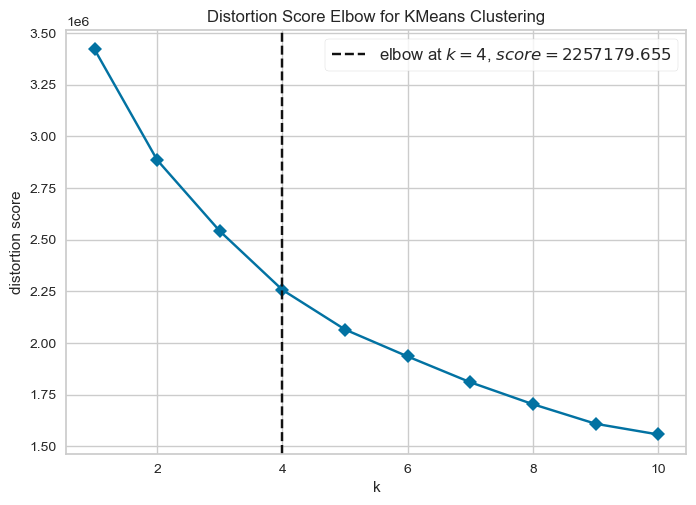

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,11), metric='distortion', timings=False
) #distortion (default) same as Euclidean distance

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()  

In [27]:
from sklearn.metrics import silhouette_score, normalized_mutual_info_score

y_true=data_norm.iloc[:,0]
model = KMeans(n_clusters=4)
y_pred=model.fit_predict(X_pca)

/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert y_true to array if it's not already (just in case)
y_true = np.array(y_true)

# Stratified sampling
X_pca_sample, _, y_true_sample, _ = train_test_split(
    X_pca, y_true, stratify=y_true,train_size=5000,random_state=42
)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, normalized_mutual_info_score

# Fit KMeans
model = KMeans(n_clusters=4, n_init=10)
y_pred = model.fit_predict(X_pca_sample)

# Evaluate
silhouette = silhouette_score(X_pca_sample, y_pred)
purity = purity_score(y_true_sample, y_pred)
nmi = normalized_mutual_info_score(y_true_sample, y_pred)

print(f"Kmean Clustering Results:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Purity Score: {purity:.3f}")
print(f"NMI Score: {nmi:.3f}")


Kmean Clustering Results:
Silhouette Score: 0.165
Purity Score: 0.208
NMI Score: 0.108


# Question 2: Alternative Clustering

## Spectral Clustering

In [29]:
from sklearn.cluster import SpectralClustering


spectral = SpectralClustering(
    n_clusters=4,
    affinity='nearest_neighbors',
    n_jobs=-1,
    random_state=42
)

y_pred_spectral = spectral.fit_predict(X_pca_sample)

# Evaluate
silhouette_spectral = silhouette_score(X_pca_sample, y_pred_spectral)
purity_spectral = purity_score(y_true_sample, y_pred_spectral)
nmi_spectral = normalized_mutual_info_score(y_true_sample, y_pred_spectral)

print(f"Spectral Clustering Results:")
print(f"Silhouette Score: {silhouette_spectral:.3f}")
print(f"Purity Score: {purity_spectral:.3f}")
print(f"NMI Score: {nmi_spectral:.3f}")

Spectral Clustering Results:
Silhouette Score: 0.136
Purity Score: 0.405
NMI Score: 0.579


## Gaussian Mixture

In [30]:
from sklearn.mixture import GaussianMixture

# Implement GMM
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
y_pred_gmm = gmm.fit_predict(X_pca_sample)

# Evaluate
silhouette_gmm = silhouette_score(X_pca_sample, y_pred_gmm)
purity_gmm = purity_score(y_true_sample, y_pred_gmm)
nmi_gmm = normalized_mutual_info_score(y_true_sample, y_pred_gmm)

print(f"Gaussian Mixture Model Results:")
print(f"Silhouette Score: {silhouette_gmm:.3f}")
print(f"Purity Score: {purity_gmm:.3f}")
print(f"NMI Score: {nmi_gmm:.3f}")

Gaussian Mixture Model Results:
Silhouette Score: 0.102
Purity Score: 0.347
NMI Score: 0.391


# Question 3: Shape Based Clustering

## Hierarchical Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=4, linkage='complete') #ward get .295
y_pred_hier = hierarchical.fit_predict(X_pca_sample)

silhouette_hier = silhouette_score(X_pca_sample, y_pred_hier)
purity_hier = purity_score(y_true_sample, y_pred_hier)
nmi_hier = normalized_mutual_info_score(y_true_sample, y_pred_hier)

print(f"Hierarchical Clustering Results:")
print(f"Silhouette Score: {silhouette_hier:.3f}")
print(f"Purity Score: {purity_hier:.3f}")
print(f"NMI Score: {nmi_hier:.3f}")

Hierarchical Clustering Results:
Silhouette Score: 0.362
Purity Score: 0.133
NMI Score: 0.018


## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
import numpy as np

# Fit DBSCAN
dbscan = DBSCAN(eps=1.4, min_samples=22, n_jobs=-1)
y_pred = dbscan.fit_predict(X_pca_sample)

# Identify non-noise points
mask = y_pred != -1
X_valid = X_pca_sample[mask]
y_true_valid = y_true_sample[mask]
y_pred_valid = y_pred[mask]

# Evaluate if valid clusters exist
if len(np.unique(y_pred_valid)) > 1:
    sil = silhouette_score(X_valid, y_pred_valid)
    pur = purity_score(y_true_valid, y_pred_valid)
    nmi = normalized_mutual_info_score(y_true_valid, y_pred_valid)
else:
    sil = pur = nmi = np.nan

# Report
print(f"DBSCAN Results:")
print(f"Silhouette Score: {sil:.3f}" if not np.isnan(sil) else "Silhouette Score: N/A")
print(f"Purity Score: {pur:.3f}" if not np.isnan(pur) else "Purity Score: N/A")
print(f"NMI Score: {nmi:.3f}" if not np.isnan(nmi) else "NMI Score: N/A")
print(f"Clusters Found: {len(np.unique(y_pred[y_pred >= 0]))}")
print(f"Noise Points: {100 * np.mean(y_pred == -1):.2f}%")


DBSCAN Results:
Silhouette Score: 0.050
Purity Score: 0.146
NMI Score: 0.016
Clusters Found: 4
Noise Points: 18.79%


# Question 4: Evaluation


Both shape-based clustering outperform non-shape based clustering, with spectral clustering providing the best solution  (highest Purity & NMI) because it successfully capture the true shape of the cluster, especially for the non-convex shape region. 

Overall, spectral clustering provide more meaningful and accurate clustering result in this data. Unlike K-means, which assumes convex cluster shape and assign label based on distance to centroids (often splitting curved shape into multiple parts), spectral clustering constructs an undirected graph and performs clustering based on connectivity, making it more suitable for identifying non-convex cluster.

The significant gap between spectral clustering (NMI: 0.579) and the next best method, GMM (NMI: 0.391), further demonstrates how well spectral clustering captures the underlying structure of this particular dataset. While hierarchical clustering achieved the highest silhouette score, its poor performance on NMI and purity metrics indicates it found well-separated clusters that don't align with the true class structure.


# Question 5

## Correlation Matrix between independent variable

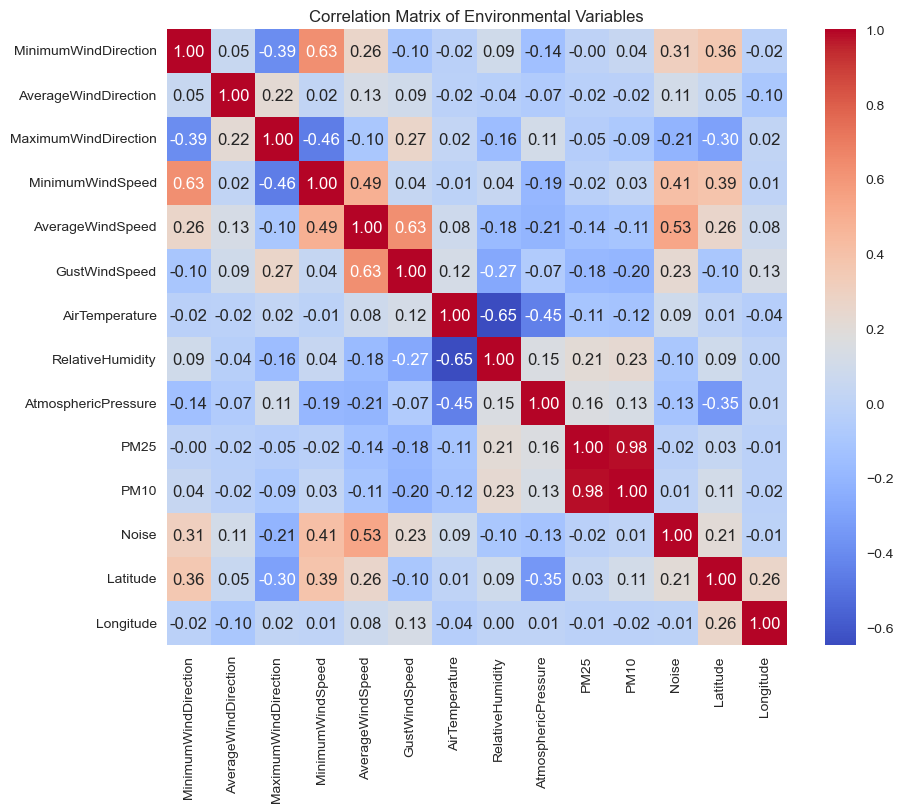

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the label for this step
features_only = df.drop(columns=['SensorLocation'])

# Compute correlation matrix
corr_matrix = features_only.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Environmental Variables")
plt.show()


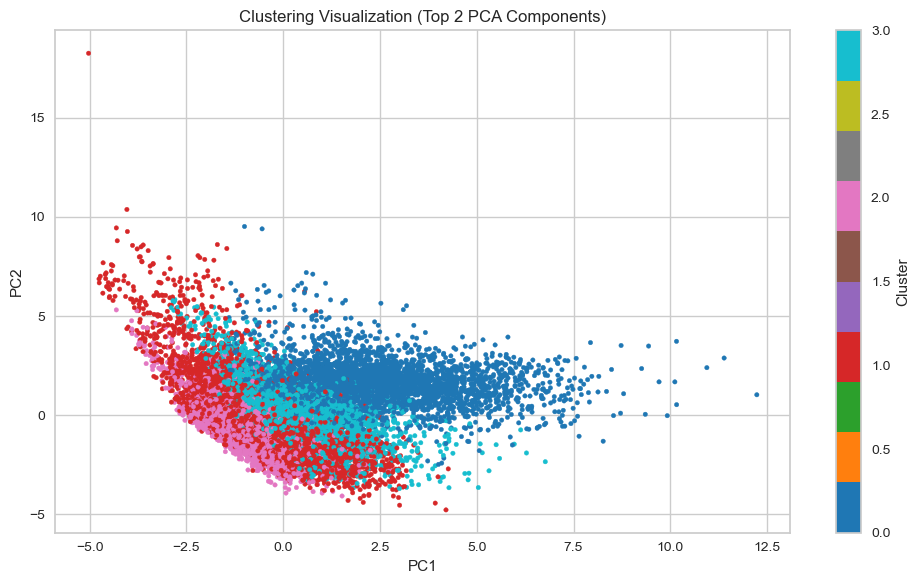

In [34]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Fit clustering on full PCA data
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
y_pred = model.fit_predict(X_pca_sample)

# Plot using top 2 components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=y_pred, cmap='tab10', s=10)
plt.title("Clustering Visualization (Top 2 PCA Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


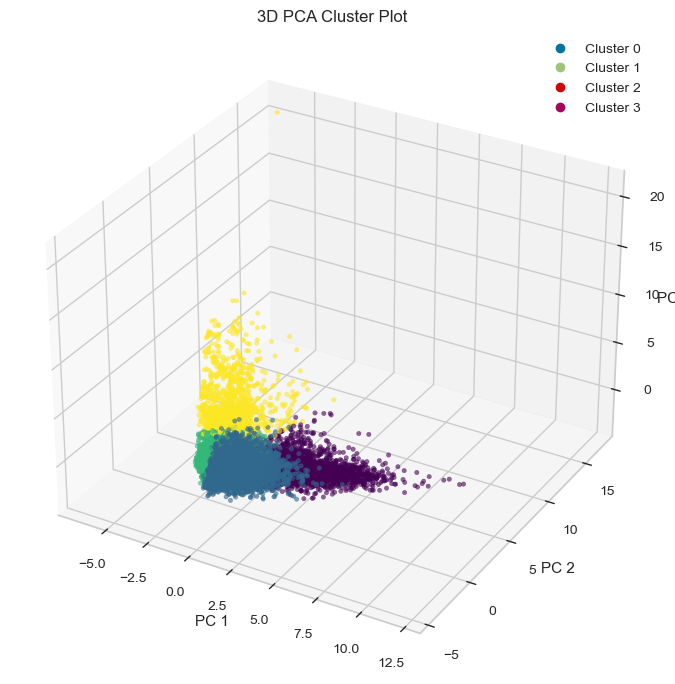

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Ensure you have already performed PCA with at least 3 components
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_pca_sample)  # or use full X if you want

# Let's say y_pred is the result of your clustering model (e.g., KMeans, GMM, etc.)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
sc = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y_pred, cmap='viridis', s=10, alpha=0.6
)

# Add labels and title
ax.set_title("3D PCA Cluster Plot")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

from matplotlib.lines import Line2D
unique_labels = np.unique(y_pred)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                          markerfacecolor='C'+str(i)) for i in unique_labels]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

/var/folders/d3/br7mghg51l92_kln9z12dlhm0000gn/T/ipykernel_31421/877472593.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(labels))  # up to 10 distinct colors


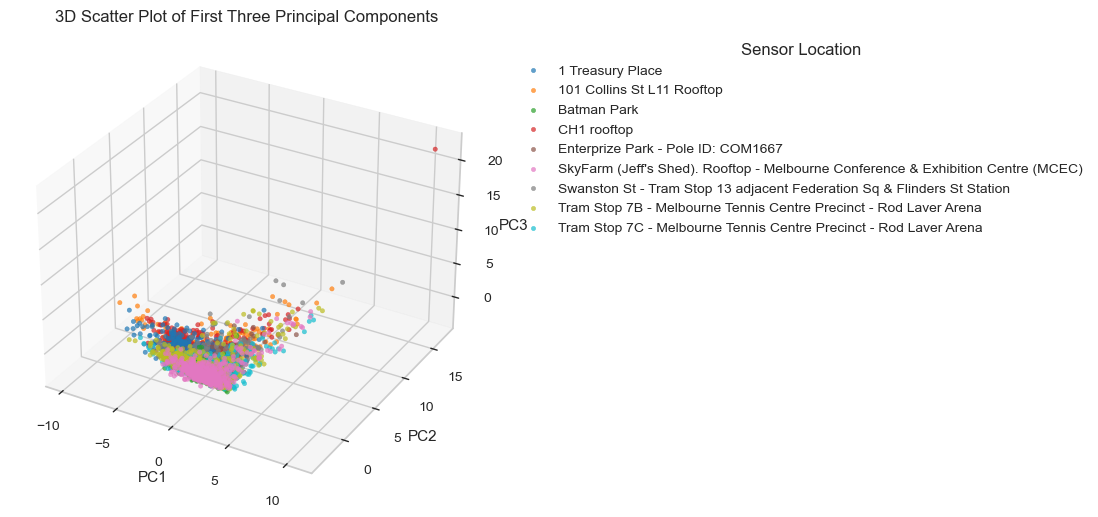

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Reduce to 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_pca_sample)

# Assign color map
labels = np.unique(y_true_sample)
colors = cm.get_cmap('tab10', len(labels))  # up to 10 distinct colors

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    mask = y_true_sample == label
    ax.scatter(X_pca_3[mask, 0], X_pca_3[mask, 1], X_pca_3[mask, 2], 
               color=colors(i), label=label, alpha=0.7, s=10)

ax.set_title('3D Scatter Plot of First Three Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title='Sensor Location', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# t-SNE with 3 components for 3D plot
tsne = TSNE(n_components=3, random_state=42, method='exact')
projections = tsne.fit_transform(X_pca_sample)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

x = projections[:, 0]
y = projections[:, 1]
z = projections[:, 2]

sc = ax.scatter(x, y, z, c=y_pred, cmap='viridis', s=10, alpha=0.6)
ax.set_title("3D t-SNE projection (colored by predicted clusters)")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")



# Question 6

In [72]:
data_norm

,SensorLocation,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise,Latitude,Longitude
0,Swanston St - Tram Stop 13 adjacent Federation...,-0.368034,-0.227953,0.553693,-0.373303,2.686278,1.631295,1.026636,-0.439749,-0.517897,-0.694367,-0.788142,1.119176,-0.048545,-0.081489
1,1 Treasury Place,-0.368034,-0.302941,0.528198,-0.373303,0.781738,1.592354,1.127928,-0.505391,-1.068109,-0.694367,-0.788142,-0.600826,1.490587,0.661839
2,Enterprize Park - Pole ID: COM1667,-0.368034,-1.127812,-2.314573,-0.373303,0.280543,-0.393598,1.212338,-0.278626,-0.530401,-0.565706,-0.455028,-0.053553,-0.589890,-0.977821
4,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,-0.368034,0.505265,0.566441,-0.373303,-0.320891,0.268386,1.313631,-0.654579,-0.742984,-0.694367,-0.788142,-0.864690,-1.121690,-1.691502
5,Enterprize Park - Pole ID: COM1667,-0.368034,1.471780,-3.602106,2.432909,0.681499,-0.588299,1.127928,-0.356203,-0.567916,-0.565706,-0.455028,-0.034007,-0.589890,-0.977821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308234,1 Treasury Place,-0.368034,1.421787,0.540945,-0.373303,-0.020174,-0.627240,0.520173,-0.582969,-0.893042,0.720900,0.433275,-1.910373,1.490587,0.661839
308235,Swanston St - Tram Stop 13 adjacent Federation...,-0.368034,-1.102816,0.566441,-0.373303,0.481021,1.436593,2.140852,-2.230004,-1.018090,-0.051064,-0.232952,0.738039,-0.048545,-0.081489
308236,Batman Park,-0.368034,1.030182,0.566441,-0.373303,-0.822086,0.190506,2.107088,-2.086784,-0.667955,0.334918,0.100162,-0.327190,-1.080802,-1.275295
308238,1 Treasury Place,-0.368034,1.330135,0.566441,-0.373303,3.788906,1.475534,2.123970,-2.140491,-1.593312,-0.051064,-0.010876,0.708721,1.490587,0.661839
